<a href="https://colab.research.google.com/github/cassidyhanna/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Copy_of_LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
# TODO - code!
def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):
  drunk_prob = ((prob_drunk_prior * prob_positive)/ prob_positive_drunk)
  return drunk_prob
  
  

In [2]:
prob_drunk_given_positive(1,0.001,0.08)

0.0125

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import ks_2samp
from matplotlib import style
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel


data = ('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data')
df = pd.read_csv(data, names = ['class name','handicapped-infants', 'water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid','religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile',
          'immigration','synfuels-corporation-cutback','education-spending','superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa'])

In [4]:
df = df.replace({'y': 1.0, 'n': 0.0, '?': np.nan})
df = df.dropna()
df.head()

,class name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
19,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [0]:

demo = df[df['class name'] == 'democrat']

In [0]:
rep = df[df['class name'] == 'republican']

In [0]:
demo_crime = demo['crime']

In [0]:
rep_crime = rep['crime']

In [0]:
dem = stats.bayes_mvs(demo_crime, alpha=0.9)

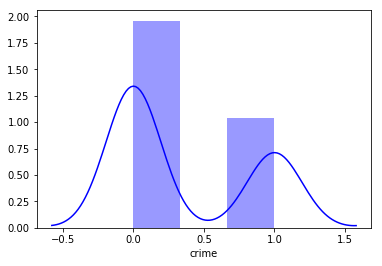

In [14]:
#sns.distplot(dem, color ='r')
sns.distplot(demo_crime, color ='b');

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)